## Linear regression and Regularization:

1. Predict the “Overall” (target attribute: “overall”) rating of the players using Linear regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.

2. Compare the performance of linear regression, Ridge regression, and Lasso regression models. Perform the hyperparameters tuning and observe how they affect the model’s bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on this feature selection process.

Note: Please carry out the necessary data preprocessing and test-train split as 20: 80%.

The use of the scikit-learn library is allowed for this question. For (b), include necessary
metrics like MSE, MAE, R2 Score for performance analysis and necessary plots (Ex:
Scatter plots/line plots) for hyperparameters tuning.

In [1]:
import pandas as pd
import datapurifier as dp
from datapurifier import Mleda

Shape of DataFrame:  (7772, 66)

Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
359,227928,Nélson Semedo,80,81,22000000.0,81000.0,27,177,69,110.0,Wolverhampton Wanderers,English Premier League,1.0,22.0,2.0,Right,3,4,2,Medium/Medium,Unique,43500000.0,NaN,Speed Dribbler (AI),82.0,57.0,68.0,81.0,75.0,75.0,76,50,58,75,42,81,61,30,65,79,81,83,87,79,79,74,81,84,67,60,81,76,72,62,38,79,75,79,77,16,12,10,14,12,NaN,0
6910,220956,R. Johnson,62,66,525000.0,2000.0,24,188,85,1928.0,Port Vale,English League Two,4.0,15.0,NaN,Left,2,2,1,High/Medium,Normal (185+),958000.0,NaN,NaN,72.0,24.0,44.0,53.0,60.0,73.0,31,21,62,53,20,53,35,22,45,49,71,73,61,57,57,27,78,69,77,25,68,59,35,47,31,55,60,61,61,10,7,10,10,13,NaN,0
5917,255798,J. Sagredo,65,68,800000.0,500.0,27,175,70,110969.0,Club The Strongest,Liga de Fútbol Profesional Boliviano,1.0,2.0,NaN,Right,3,2,1,Medium/Medium,Normal (170-185),1800000.0,NaN,NaN,68.0,29.0,48.0,57.0,66.0,64.0,48,29,65,66,23,49,26,23,55,64,67,68,55,59,75,36,74,62,70,24,51,62,21,25,32,61,63,70,68,12,5,11,9,12,NaN,0
938,228789,Robert Sanchéz,76,82,9500000.0,31000.0,23,197,85,1808.0,Brighton & Hove Albion,English Premier League,1.0,1.0,13.0,Right,4,1,1,Medium/Medium,Normal (185+),20000000.0,NaN,Comes For Crosses,NaN,NaN,NaN,NaN,NaN,NaN,12,14,15,46,15,15,12,14,50,37,45,44,31,71,35,52,70,40,66,16,27,8,7,56,15,55,18,13,15,76,73,69,75,78,45.0,0
3716,243778,M. Hiller,69,76,2400000.0,1000.0,24,189,89,33.0,TSV 1860 München,German 3. Bundesliga,3.0,1.0,NaN,Right,3,1,1,Medium/Medium,Normal (185+),4000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,9,14,29,8,8,13,12,20,16,34,29,41,54,32,45,62,19,52,9,20,12,6,27,20,14,14,14,6,69,69,60,70,72,32.0,0
7376,243045,A. Al Khatib,60,62,275000.0,4000.0,26,183,74,112096.0,Ettifaq FC,Saudi Abdul L. Jameel League,1.0,18.0,NaN,Right,3,2,1,Medium/High,Lean (170-185),474000.0,NaN,NaN,67.0,26.0,40.0,46.0,60.0,66.0,28,19,58,56,28,39,23,24,42,45,64,70,64,58,66,40,77,61,71,24,56,60,34,32,38,46,56,63,61,11,11,9,9,6,NaN,0
5357,253617,M. Villarroel,66,75,1900000.0,500.0,22,177,74,110974.0,Club Deportivo Jorge Wilstermann,Liga de Fútbol Profesional Boliviano,1.0,8.0,NaN,Left,3,2,1,High/Medium,Lean (170-185),4500000.0,NaN,Leadership,64.0,54.0,63.0,64.0,56.0,67.0,45,50,48,72,17,65,48,49,70,61,67,61,62,60,68,59,72,81,60,63,68,60,65,65,55,72,51,63,51,12,9,9,8,7,NaN,1
6351,254594,J. Rodríguez,64,73,1300000.0,3000.0,22,177,64,1881.0,Club Universidad Nacional,Mexican Liga MX,1.0,16.0,NaN,Left,2,2,1,High/High,Lean (170-185),2500000.0,NaN,NaN,87.0,46.0,54.0,53.0,56.0,50.0,73,38,50,60,30,51,34,31,60,45,90,84,79,52,76,65,65,80,32,50,54,54,53,31,37,47,61,54,54,7,8,7,13,13,NaN,0
581,226789,A. Fulgini,78,82,20000000.0,23000.0,24,183,71,1530.0,Angers SCO,French Ligue 1,1.0,10.0,NaN,Right,4,4,2,High/Medium,Lean (170-185),41500000.0,NaN,Playmaker (AI),74.0,70.0,74.0,81.0,68.0,73.0,71,75,67,78,52,85,67,66,71,81,72,75,74,75,65,70,70,80,72,68,67,66,76,78,53,72,65,72,69,12,6,11,15,14,NaN,1
4903,262620,Serginho,67,68,1200000.0,5000.0,26,180,76,112120.0,GZT Giresunspor,Turkish Sü


There are total 8 categorical and 58 numerical columns

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2

Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   short_name                   7772 non-null   object 
 2   overall                      7772 non-null   int64  
 3   potential                    7772 non-null   int64  
 4   value_eur                    7706 non-null   float64
 5   wage_eur                     7711 non-null   float64
 6   age                          7772 non-null   int64  
 7   height_cm                    7772 non-null   int64  
 8   weight_kg                    7772 non-null   int64  
 9   club_team_id                 7711 non-null   float64
 10  club_name                    7711 non-null   object 
 11  league_name                  7711 non-null   object 
 12  league_level                 7711 non-null   f

None


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491



Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



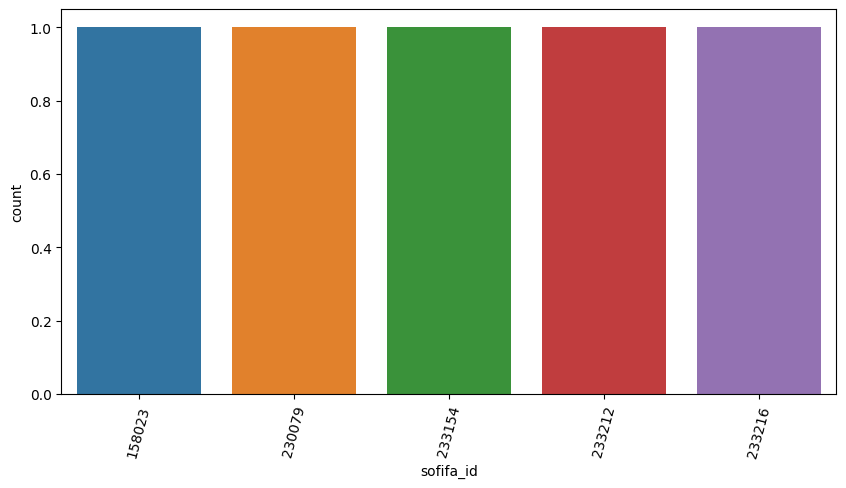

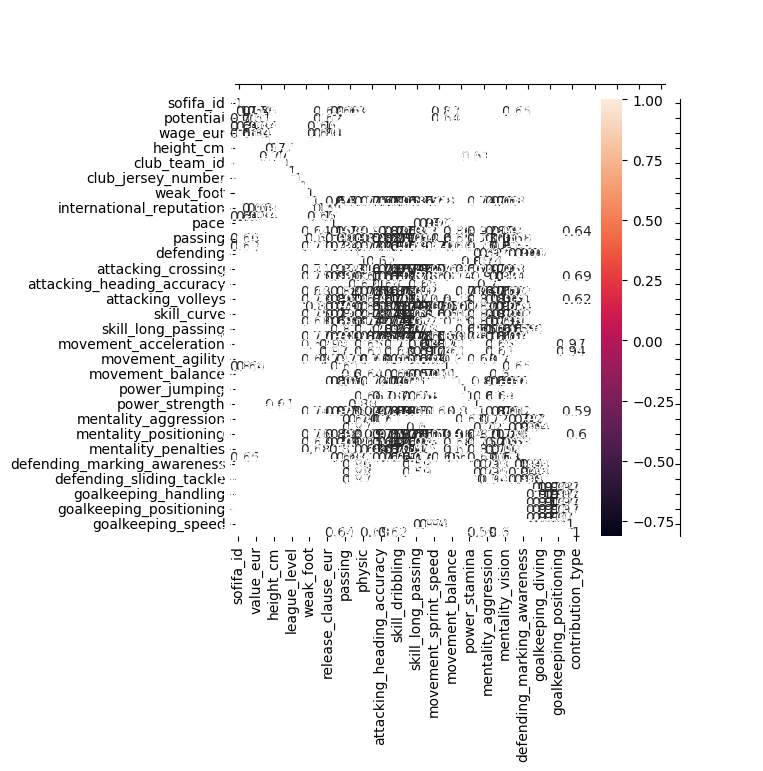

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('short_name', 'club_name', 'league_name', 'pre…

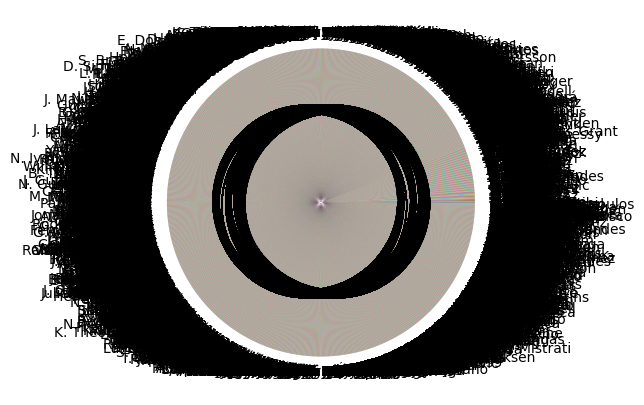

In [2]:
df = pd.read_csv("football.csv")
eda = Mleda(df)
eda